In [ ]:
from awes_ekf.setup.tether import Tether, TetherInput
from awes_ekf.setup.kite import PointMass
from awes_ekf.setup.kcu import KCU
from awes_ekf.setup.settings import ObservationData
import numpy as np
from awes_ekf.setup.settings import  SimulationConfig
import os
import yaml

kite_dict = {
    'model_name': 'kite',
    'mass': 1.0,
    'area': 400.0,
    'span': 1.0,
}

tether_dict = {
    'material_name': 'Dyneema-SK78',
    'diameter': .01,
    'n_elements': 100,
}

kcu_dict = {
    'length': 1,
    'diameter': 0.48,
    'mass': 27.6,
    'distance_kcu_kite': 11.5,
    'total_length_bridle_lines': 96,
    'diameter_bridle_lines': 0.0025,
}

config_file_name = "v3_config.yaml"
config_directory = "../data/config/"
config_path = os.path.join(config_directory, config_file_name)
        
# Load the configuration file
with open(config_path, "r") as file:
    config_data = yaml.safe_load(file)

simConfig = SimulationConfig(**config_data["simulation_parameters"])
kite = PointMass(simConfig,**kite_dict)
kcu = KCU(**kcu_dict)
kcu = None
obsData = ObservationData()



tether = Tether(kite, kcu, obsData, **tether_dict)

tether_input = TetherInput(
    kite_position = np.array([30,10,30]),
    kite_velocity = np.array([10,0,0]),
    tether_force = 1000,
    tether_length = 400,
    tether_elevation = 90,
    tether_azimuth = 0,
    wind_velocity= np.array([20,0,0])
)

True
0
[30, 10, 30]
43.5908


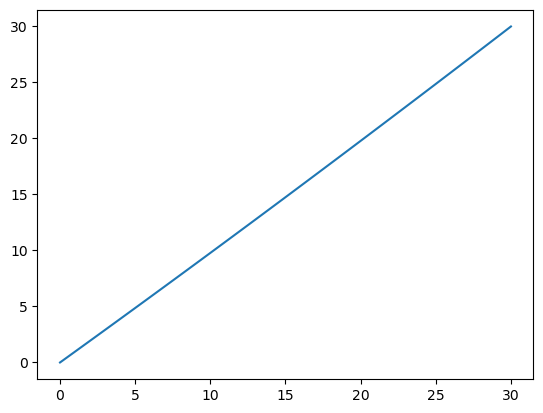

In [4]:
tether_input = tether.solve_tether_shape(tether_input)

args = tether_input.create_input_tuple(obsData)

print(tether.cd_tether(*args))
print(tether.kite_position(*args))
print(tether.tether_length(*args))
# print(tether.positions(*args))


positions = np.array(tether.positions(*args))
import matplotlib.pyplot as plt
plt.plot(positions[:,0], positions[:,2])